In [15]:
# 1. **Task**: Load a grayscale image (you can use `matplotlib.pyplot.imread` for this). Perform Singular Value Decomposition (SVD) on the image. 
# Retain only the first `k` singular values and vectors to reconstruct a compressed version of the image. Experiment with different values of `k` 
# to see the trade-off between compression and image quality.

# 2. **Bonus**: Create an interactive widget (using Jupyter widgets) where you can adjust the value of `k` and see the compressed image in real-time.

import matplotlib.pyplot as plt
import numpy as np

In [16]:
help(plt.imread)

Help on function imread in module matplotlib.pyplot:

imread(fname: 'str | pathlib.Path | BinaryIO', format: 'str | None' = None) -> 'np.ndarray'
    Read an image from a file into an array.
    
    .. note::
    
        This function exists for historical reasons.  It is recommended to
        use `PIL.Image.open` instead for loading images.
    
    Parameters
    ----------
    fname : str or file-like
        The image file to read: a filename, a URL or a file-like object opened
        in read-binary mode.
    
        Passing a URL is deprecated.  Please open the URL
        for reading and pass the result to Pillow, e.g. with
        ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
    format : str, optional
        The image file format assumed for reading the data.  The image is
        loaded as a PNG file if *format* is set to "png", if *fname* is a path
        or opened file with a ".png" extension, or if it is a URL.  In all
        other cases, *format* is ig

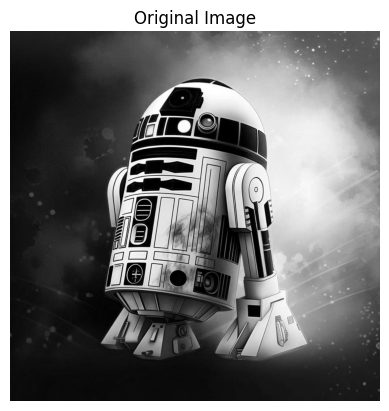

In [17]:
# Perform SVD
U, S, Vt = np.linalg.svd(image, full_matrices=False)

# Load the image
image = plt.imread('assets/r2d2.png')

# Ensure it's grayscale
if len(image.shape) == 3:
    image = plt.imread('assets/r2d2.png')[:,:,0]

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


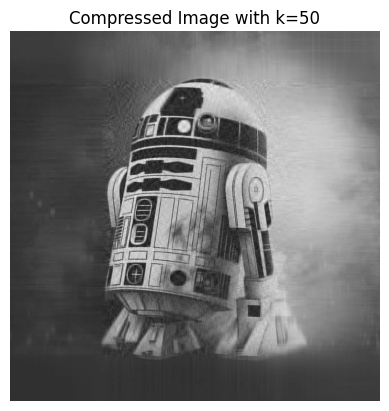

In [18]:
# Perform SVD
U, S, Vt = np.linalg.svd(image, full_matrices=False)

def compress_image(U, S, Vt, k):
    """
    Reconstruct the image using the top k singular values, vectors, and return the compressed image.
    """
    compressed_image = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    return compressed_image

# Example with k=50
k = 50
compressed_image = compress_image(U, S, Vt, k)

# Display the compressed image
plt.imshow(compressed_image, cmap='gray')
plt.title(f'Compressed Image with k={k}')
plt.axis('off')
plt.show()


In [19]:
import ipywidgets as widgets
from IPython.display import display

# Create an interactive widget
@widgets.interact(k=widgets.IntSlider(min=1, max=min(image.shape), step=1, value=50))
def interactive_compression(k):
    """
    Compress and display the image interactively.
    """
    compressed_image = compress_image(U, S, Vt, k)
    
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'Compressed Image with k={k}')
    plt.axis('off')
    plt.show()


interactive(children=(IntSlider(value=50, description='k', max=1588, min=1), Output()), _dom_classes=('widget-…